In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#lets import our models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#lets check out for metric analysis
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('C:/Users/dread-miles/Documents/Data Sets/BootCamp/heart-disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

# lets check the data for Explanatory data analysis

In [4]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

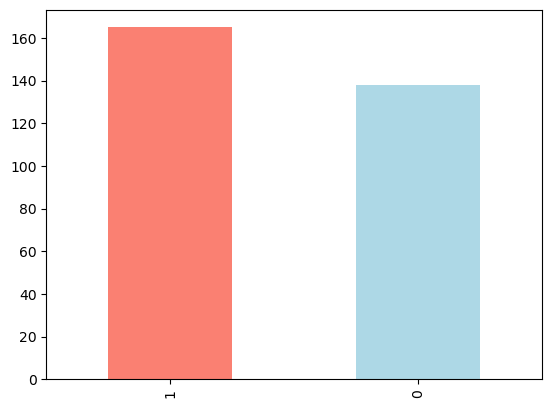

In [5]:
data["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.sex.value_counts()
#plt.plot(kind="bar",x=data["sex"],y=data["target"])

1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,24,114
1,72,93


Text(0, 0.5, 'amount')

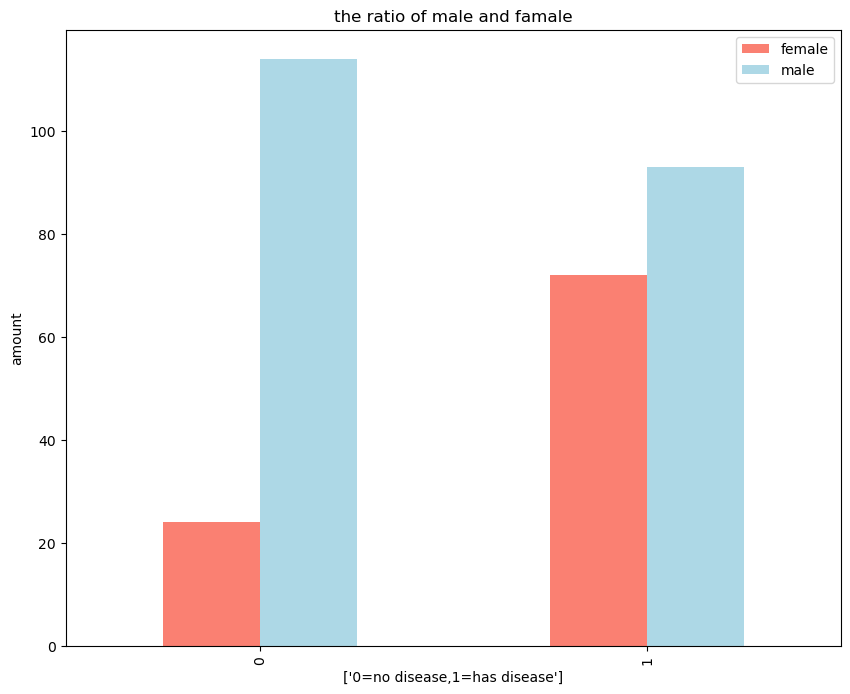

In [10]:
pd.crosstab(data.target,data.sex).plot(kind="bar",
                                      figsize=(10,8),
                                      color=["salmon","lightblue"])


plt.title("the ratio of male and famale")
plt.legend(["female","male"])
plt.xlabel(["0=no disease,1=has disease"])
plt.ylabel("amount")

# age and heartrate comparision

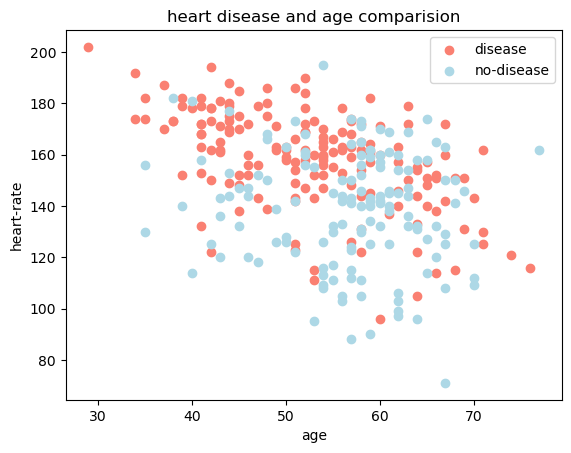

In [11]:
#this is for the positive heart-disease
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="salmon")
#this is for the negative
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           c="lightblue");
plt.title("heart disease and age comparision")
plt.legend(["disease","no-disease"])
plt.xlabel("age")
plt.ylabel("heart-rate");

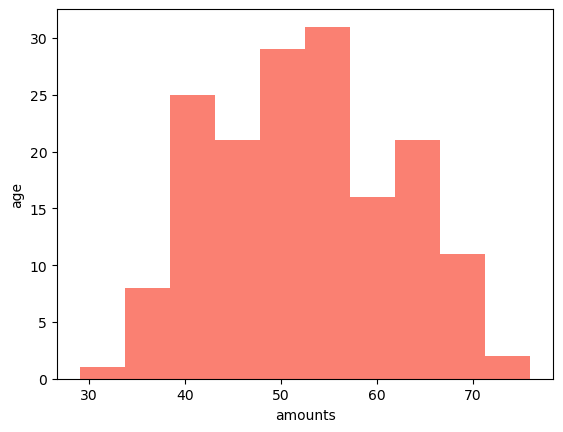

In [12]:
#lets check for distribution
plt.hist(data.age[data.target==1],
        color="salmon");
plt.xlabel("amounts")
plt.ylabel("age");

# heart disease and chest pain

In [13]:
pd.crosstab(data.target,data.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


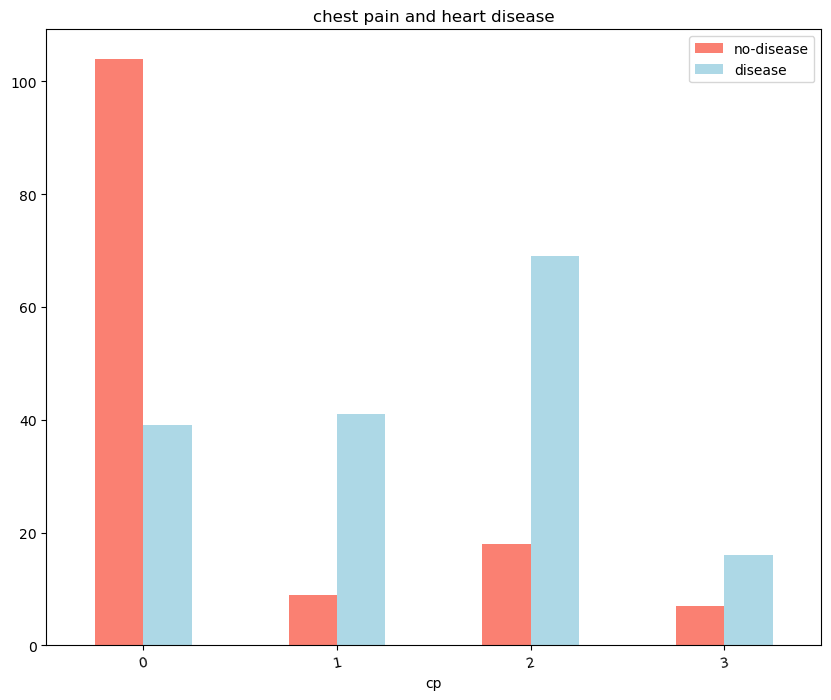

In [14]:
#lets visulize it
pd.crosstab(data.cp,data.target).plot(kind="bar",
                                     figsize=(10,8),
                                     color=["salmon","lightblue"])
plt.title("chest pain and heart disease")
plt.xticks(rotation=10)
plt.legend(["no-disease","disease"]);

In [15]:
# lets make a corelation matrix
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


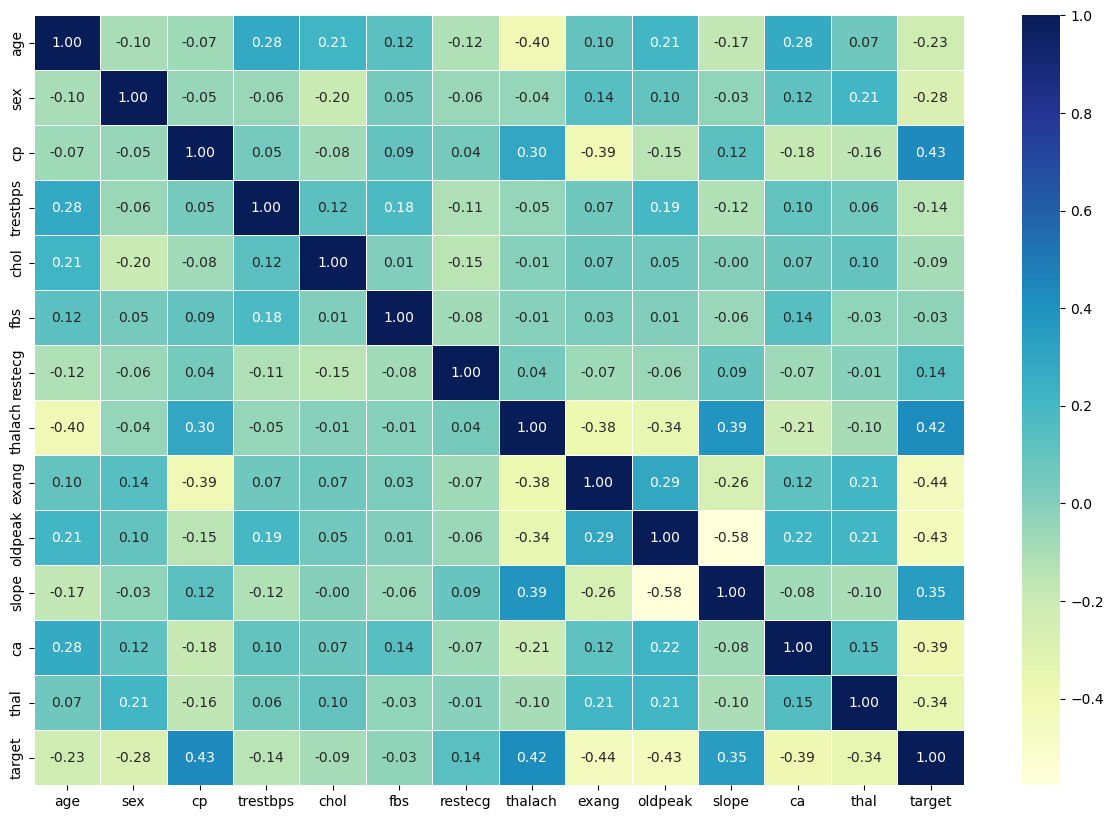

In [16]:
corr_mat=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat,annot=True, 
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")#,

# modelling

In [17]:
x=data.drop(["target"],axis=1)
y=data["target"]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [20]:
#lets seed the random states
np.random.seed(42)
#lets experiment using different mdoels 
models={"logistic regression":LogisticRegression(),
       "KNN":KNeighborsClassifier() ,
        "random forest":RandomForestClassifier()
       }
def model_experiment(models,x_train,x_test,y_train,y_test):
    #we are going to experiment with this and save the score here
    model_score={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name]=model.score(x_test,y_test)
    return model_score
        

In [21]:
#lets see the result
model_evaluation=model_experiment(models=models,
                                  x_train=x_train,
                                  x_test=x_test,
                                  y_train=y_train,
                                  y_test=y_test)


C:\Users\dread-miles\miniconda3\envs\snaky\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
model_evaluation

{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'random forest': 0.8360655737704918}

# model comparision

<AxesSubplot:>

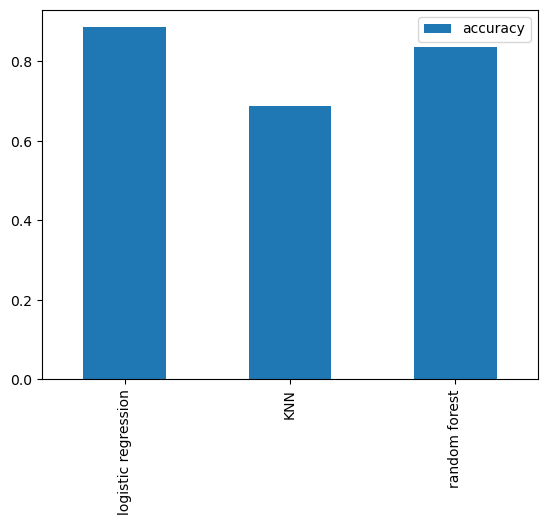

In [23]:
model_compare=pd.DataFrame(model_evaluation,index=["accuracy"])
model_compare.T.plot.bar()

In [24]:
#hyperparameter tunning with 
n_weights=range(1,20)
knn=KNeighborsClassifier()

train_score=[]
test_score=[]
for i in n_weights:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

the maximum score value is 75.41%


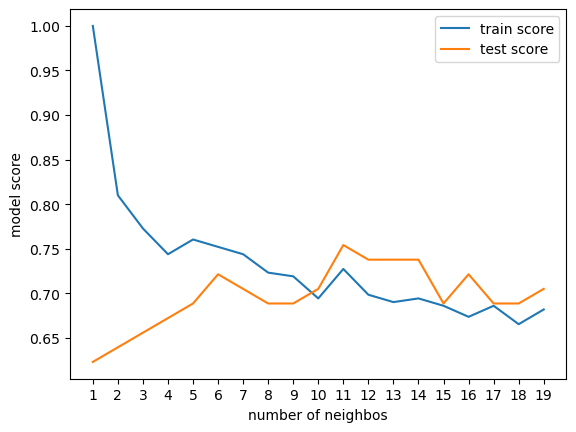

In [25]:
plt.plot(n_weights,train_score,label="train score")
plt.plot(n_weights,test_score,label="test score")
plt.xticks(np.arange(1,20,1))
plt.xlabel("number of neighbos")
plt.ylabel("model score")
plt.legend()
print(f"the maximum score value is {max(test_score)*100:.2f}%")

In [26]:
#logistic regressor parameters
log_reg_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}
#random forest regressor
rf_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_split":np.arange(1,20,2)
}

In [27]:
log_regression=RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=log_reg_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True
                                 )
log_regression.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
log_regression.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
log_regression.score(x_test,y_test)

0.8852459016393442

# know lets tune the random forest model

In [30]:
np.random.seed(42)
#lets fine tune it
rf_classifier=RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=50,
                                verbose=True
                                )
#lets fit it 
rf_classifier.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\dread-miles\miniconda3\envs\snaky\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dread-miles\miniconda3\envs\snaky\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dread-miles\miniconda3\envs\snaky\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\dread-miles\miniconda3\envs\snaky\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rf_classifier.best_params_

{'n_estimators': 160, 'min_samples_split': 3, 'max_depth': None}

In [32]:
rf_classifier.score(x_test,y_test)

0.8688524590163934

# know lets hyperparameter tune with grid search cv

In [33]:
log_grid={
    "C":np.logspace(-4,4,30),
    "solver":["liblinear"]
}
#lets setup the grid searchcv
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_grid,
                       cv=5,
                       verbose=True)
#lets fit the grid search 
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [34]:
# the best hyper parameters are
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [35]:
# lets evaluate the score on test data
gs_log_reg.score(x_test,y_test)

0.8852459016393442

# lets evaluate our model beyond accuracy

In [37]:
#lets see what the model predicted 
y_preds=gs_log_reg.predict(x_test)

In [38]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [39]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [40]:
np.mean(y_preds==y_test)

0.8852459016393442

In [70]:
#lets plot a roc curve
roc_curve(y_test,y_preds)


(array([0.        , 0.13793103, 1.        ]),
 array([0.     , 0.90625, 1.     ]),
 array([2, 1, 0], dtype=int64))

In [52]:
#confusion matric
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

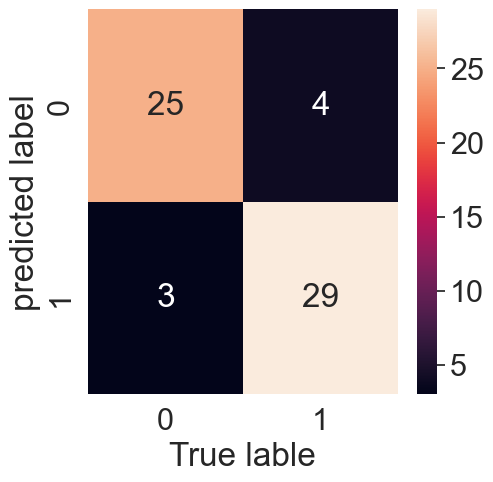

In [62]:
#ploting confusion matrix with some nice graphics
sns.set(font_scale=2)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(5,5))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=True) 
    plt.xlabel("True lable")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds)    

In [71]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# lets evaluate the model using cross validation 

In [73]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [77]:
#lets evaluate using the cross val score for accuracy,precision and f1 score
log_reg=LogisticRegression(C=0.20433597178569418,solver="liblinear")

#lets evaluate the cross validated precision
cv_precison=cross_val_score(log_reg,
                           x,
                           y,
                           scoring="precision",
                           cv=5
                           )

In [79]:
cv_precison

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [80]:
np.mean(cv_precison)

0.8207936507936507

In [85]:
cv_prec=np.mean(cv_precison)
cv_prec

0.8207936507936507

In [82]:
#lets evalute accuracy
cv_accuracy=cross_val_score(log_reg,
                           x,
                           y,
                           scoring="accuracy",
                           cv=5)

In [87]:
cv_acc=np.mean(cv_accuracy)
cv_acc

0.8446994535519124

In [88]:
#lets evalute accuracy
cv_f1=cross_val_score(log_reg,
                           x,
                           y,
                           scoring="f1",
                           cv=5
                     )

In [89]:
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [91]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

In [100]:
cv_recall=cross_val_score(log_reg,
                           x,
                           y,
                           scoring="recall",
                           cv=5
                     )

In [102]:
cv_recall=np.mean(cv_recall)

<AxesSubplot:title={'center':'cross-validated-score'}>

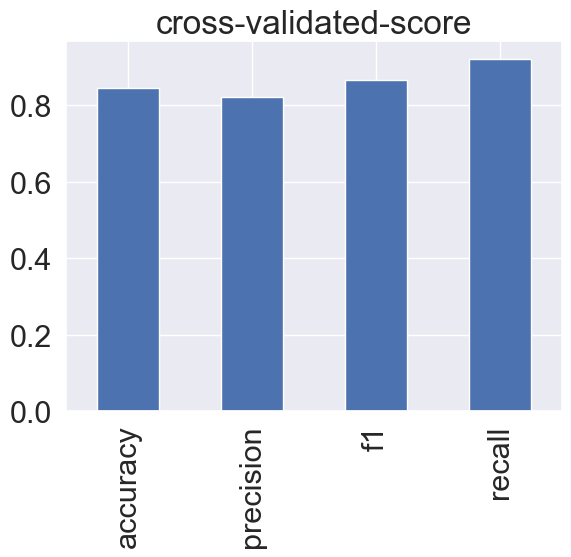

In [103]:
#lets visualize it
df=pd.DataFrame({"accuracy":cv_acc,
                "precision":cv_prec,
                "f1":cv_f1,
                "recall":cv_recall},
                index=[0]
              )
df.T.plot.bar(title="cross-validated-score",
             legend=False)

# and know lets see feature importance

In [99]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [107]:
#lets check out feature importance
gs_log_reg.best_params_
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [108]:
clf.coef_

array([[ 0.00316728, -0.86044655,  0.66067042, -0.01156993, -0.00166374,
         0.04386109,  0.31275847,  0.02459361, -0.60413083, -0.56862804,
         0.4505163 , -0.63609898, -0.67663378]])

In [120]:
#lets match the coefficient with the features
feature_importance=dict(zip(data.columns,list(clf.coef_[0])))

In [121]:
feature_importance

{'age': 0.0031672809701328098,
 'sex': -0.8604465542018854,
 'cp': 0.6606704161071124,
 'trestbps': -0.011569931839584581,
 'chol': -0.0016637442846940298,
 'fbs': 0.043861090099753856,
 'restecg': 0.3127584688139112,
 'thalach': 0.024593614036076978,
 'exang': -0.6041308274033194,
 'oldpeak': -0.5686280446250761,
 'slope': 0.45051629703183155,
 'ca': -0.6360989766185763,
 'thal': -0.6766337834775279}

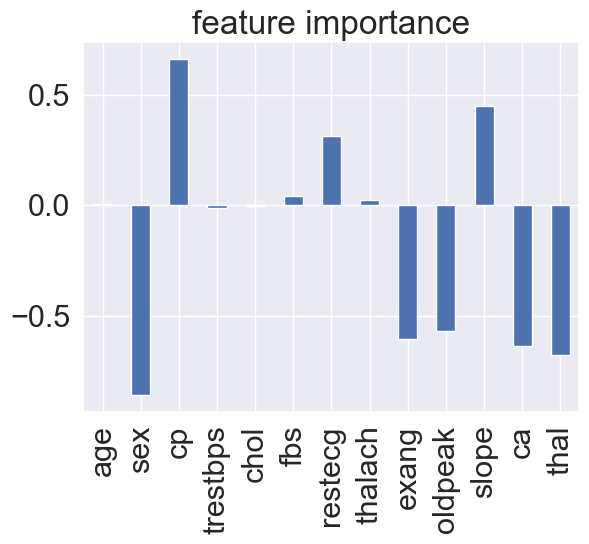

In [126]:
feature_df=pd.DataFrame(feature_importance,index=[0])
feature_df.T.plot.bar(title="feature importance",legend=False);

# THE END